Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **25 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Andriy Kashyrskyy"
COLLABORATORS = ""

---

# CS110 Pre-class Work - Deterministic Quicksort

## Question 1 [time estimate: 5 minutes]

Using Figure 7.1 in Cormen et al. as a model, perform manually the partition process on the following list: A = [1,5,6,2,3,8,9,4,7]. You just need to specify the followings:
1. The array after the process is done.
2. The value of $i$ after the process is done.

1. The array is [1,5,6,2,3,4,7,9,8].
2. The value of i is index of 5 (corresponding to element 4).

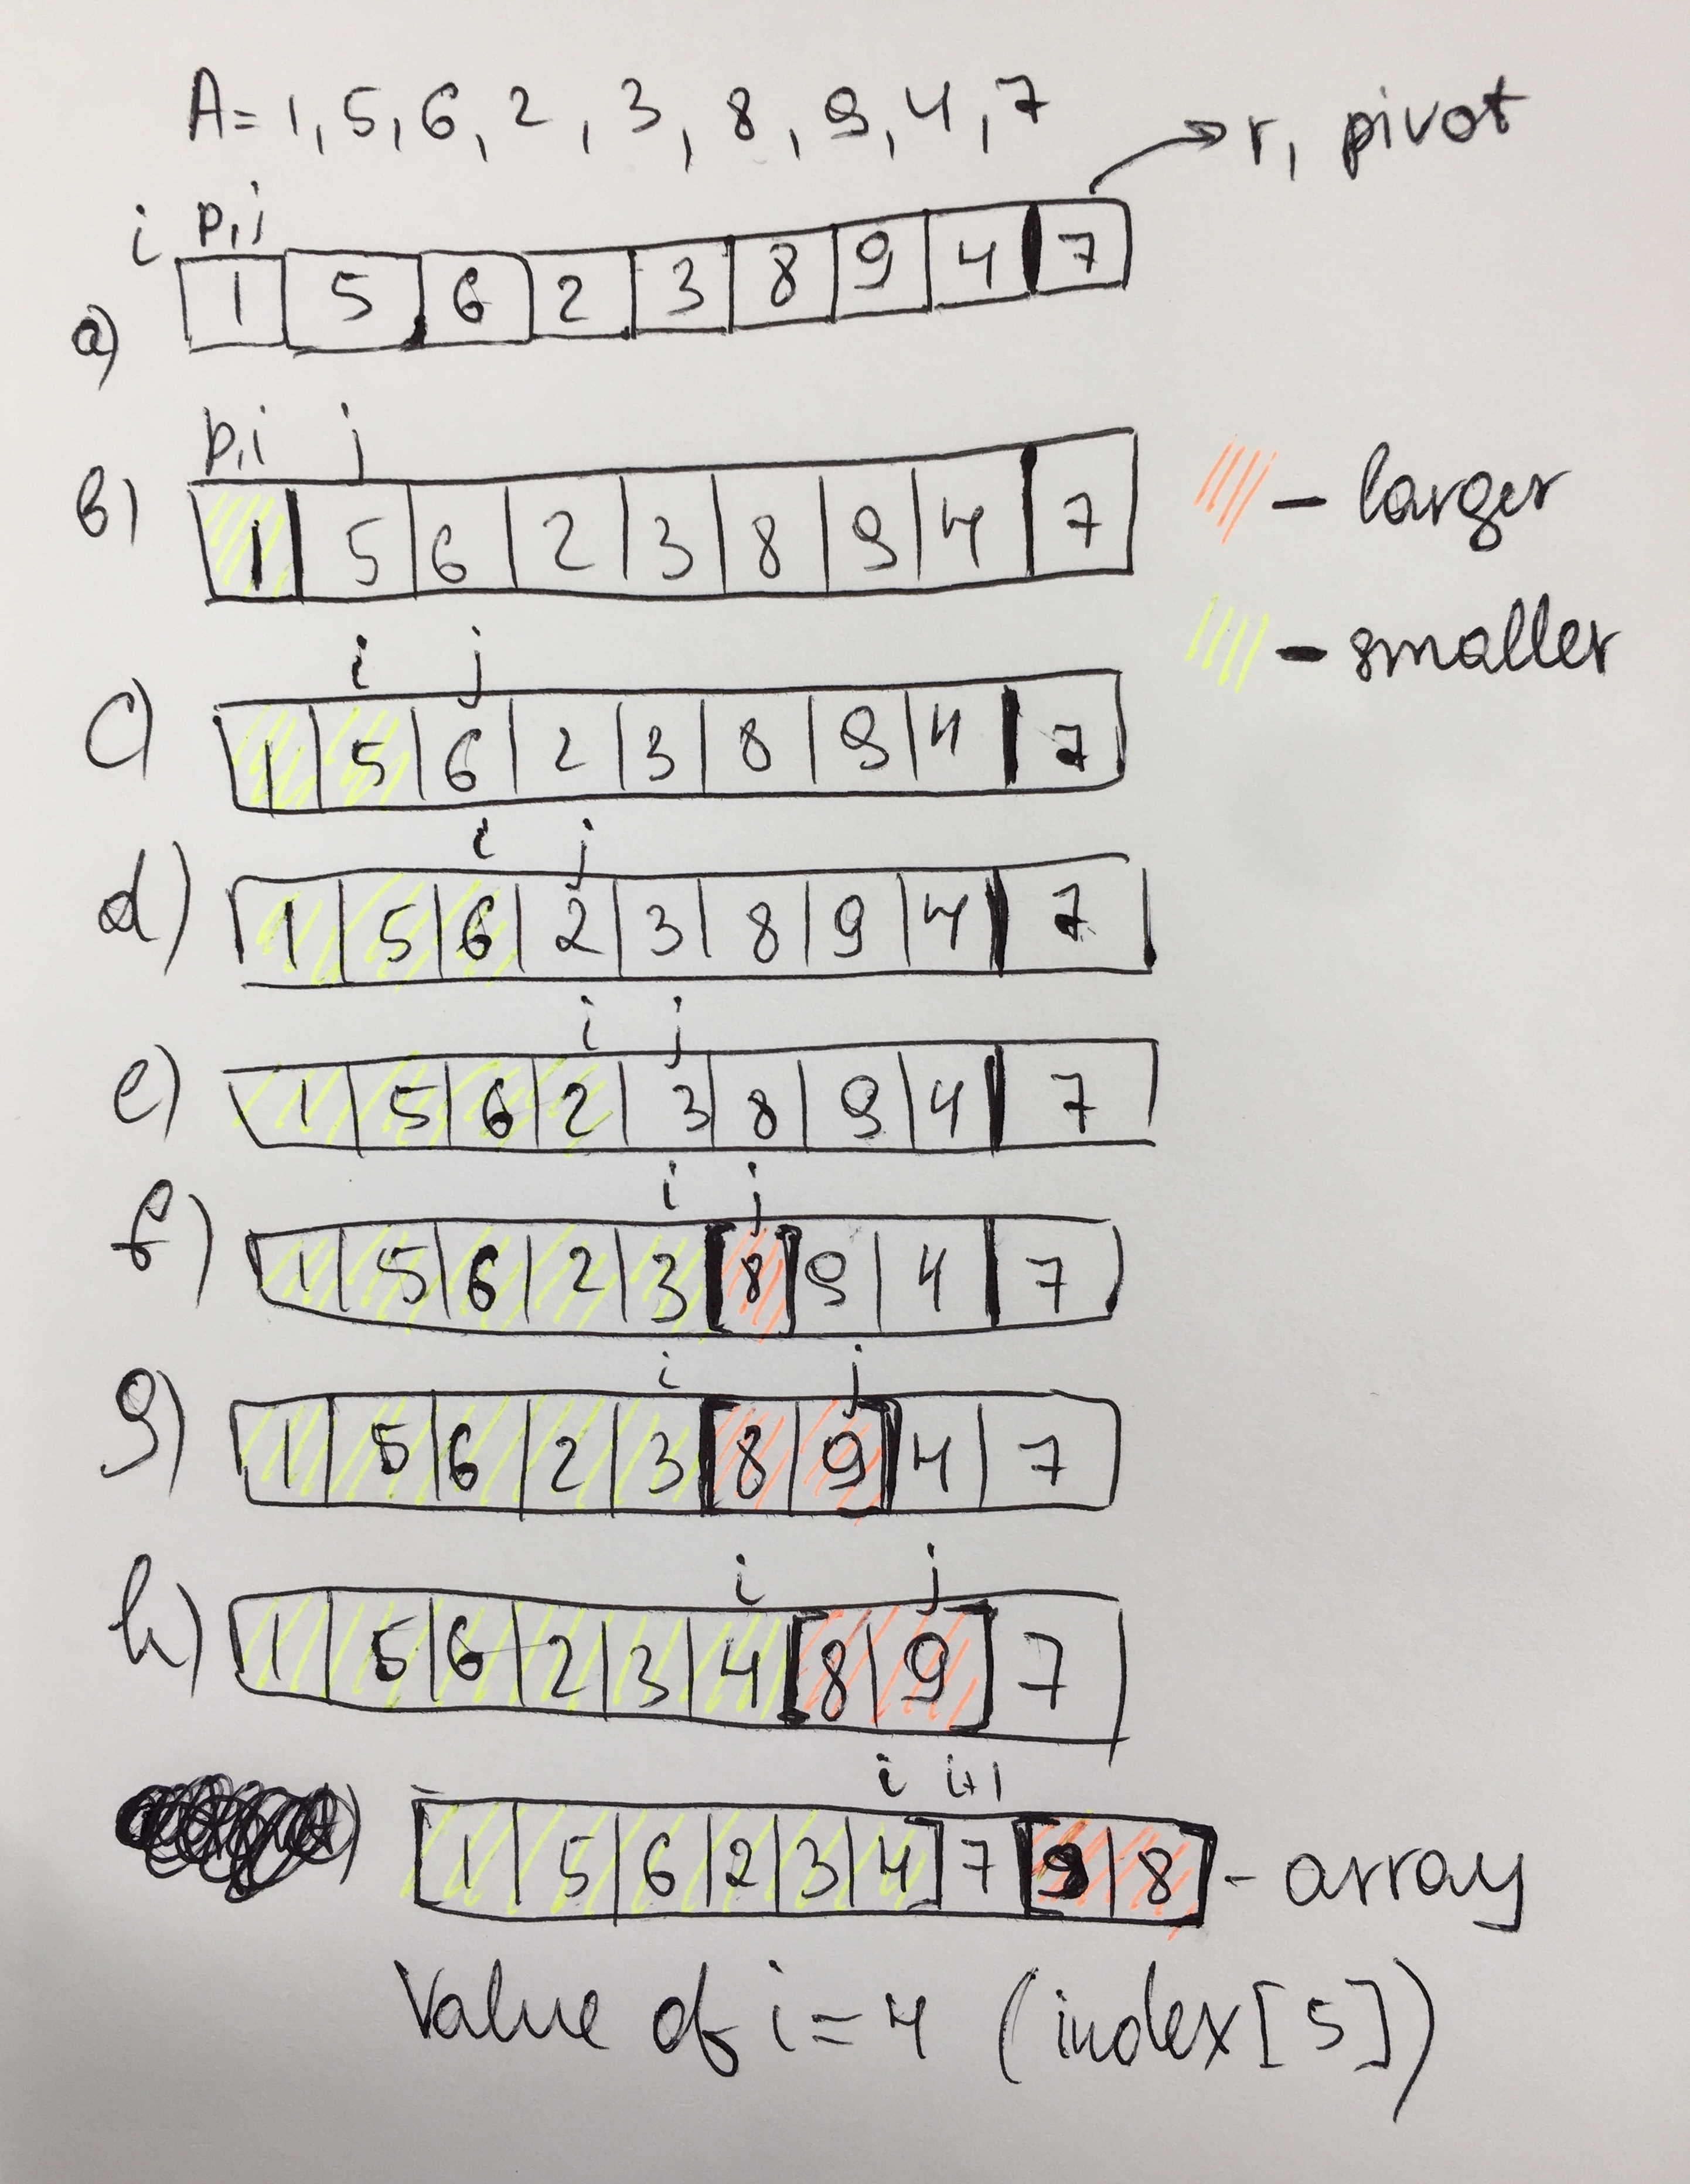

In [2]:
from IPython.display import Image
Image(filename="IMG_5392.JPG")

## Question 2 [time estimate: 7 minutes]

Code up a Python implementation of `partition(A, p, r)`, closely follow the pseudo-code in Cormen et al., p.172. Your function should return the index of the pivot in the array.

In [7]:
def partition(A,p,r):
    """
    Assume r<len(A) and p>=0
    
    Note: This function picks the last element as pivot, 
    places it in the correct position in a sorted array
    (all smaller elements before it to the left, 
    all bigger - after, to the right).
    """
    x = A[r] ## pivot
    i = p - 1 ## index of a smaller element
    
    ## if current elementt is smaller than or equal to pivot
    for j in range(p, r):
        if A[j] <= x:
            ## increment index of smaller element
            i = i + 1
            A[i], A[j] = A[j], A[i] 
            
    A[i+1], A[r] = A[r], A[i+1]
    return (i + 1) 

A = [1,5,6,2,3,8,9,4,7]
partition(A, 0, len(A)-1)

6

In [8]:
A = [1,5,6,2,3,8,9,4,7]
assert(partition(A, 0, len(A)-1)==6)

## Question 3 [time estimate: 3 minutes]

Code up your own Python implementation of `quicksort(A, p, r)`, using `partition(A,p,r)`.

In [18]:
def quick_sort(A,p,r):
    if len(A) == 1: ## simple base case condition if array is of length 1
        return A ## returning initial array of 1, as it is already sorted
    if p < r:
        ## q is a partitioning index
        q = partition(A,p,r) ## 
        quick_sort(A, p, q-1) ## calling quick_sort on left side
        quick_sort(A, q+1, r) ## calling quick sort on right side
        return A ## returning sorted array

In [19]:
A = [0]
assert(quick_sort(A, 0, 0) == [0])
A = [3,1,2]
assert(quick_sort(A, 0, 2) == [1,2,3])

## Question 4 [time estimate: 10 minutes] 

Explain (using experimental plots) the running time of `quick_sort` when: 
1. all elements of array A have the same value (e.g., [1,1,1])?
2. array A contains distinct elements sorted in decreasing order (e.g., [5,4,2,1])?


In [71]:
## for all elements having the same value 
import time
experimental_1 = {}
experimental_2 = {}

for i in range(1,300,5):
    list_1 = [1 for i in range(i)]
    list_2 = [i for i in range(i,0,-1)]

    start1 = time.time()
    quick_sort(list_1,0,len(list_1)-1)
    end1 = time.time()
    experimental_1[i] = end1 - start1

    start2 = time.time()
    quick_sort(list_2, 0, len(list_2)-1)
    end2 = time.time()
    experimental_2[i] = end2-start2   

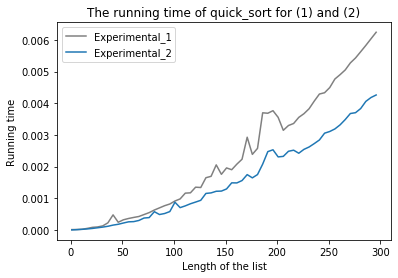

In [77]:
import matplotlib.pyplot as plt

lists1 = sorted(experimental_1.items()) 
x1, y1 = zip(*lists1) 
lists2 = sorted(experimental_2.items()) 
x2, y2 = zip(*lists2) 

plt.plot(x1, y1, label = 'Experimental_1', color = 'grey') + plt.plot(x2, y2, label = 'Experimental_2')
plt.legend()
plt.xlabel('Length of the list')
plt.ylabel('Running time')
plt.title('The running time of quick_sort for (1) and (2)')
plt.show()

We see that the running time exhibits O(n^2) scaling behavior for both cases, and the second case of elements sorted in decreasing order performs slightly faster than the first case of inputs with the same elements. The worst case scenario is for quicksort to have a sorted array, as it has to go through all elements (we will always have to swap elements if one is less than or equal to our pivot of 1, which in this case happens n-1 times, while going through all elements n times, exhibiting n(n-1)/2 or O(n^2)).